In [1]:
# ===================================================================================
#
# PROJETO CONCLUSÃO DO CURSO DSA Big Data Real-Time Analytics com Python e Spark
# Projeto 4 - Prevendo Customer Churn em Operadoras de Telecom
# Aluno: Miguel Katayama
#
# Dataset obtido: disponibilizado pela DSA
# ===================================================================================

# IMPORTANDO BIBLIOTECAS

In [2]:
# ===================================================================================
# Importando as bibliotecas
# ===================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
%matplotlib inline         
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 

In [3]:
# ===================================================================================
# Carregando os arquivos
# ===================================================================================

arquivo_treino = 'projeto4_telecom_treino.csv'
arquivo_teste = 'projeto4_telecom_teste.csv'

dftreino = pd.read_csv(arquivo_treino)
dfteste = pd.read_csv(arquivo_teste)

In [4]:
# Como são dois arquivos separados, apenas verifica se realmente todos os atributos do arquivo treino estão 
# no arquivo teste
lista_atributos_treino = dftreino.columns
lista_atributos_teste = dfteste.columns

atributo_nao_existe = []

atributo_nao_existe = [col for col in lista_atributos_treino if col not in lista_atributos_teste]

if len(atributo_nao_existe) > 0:
    print('Erro! Há atributos que não existem no arquivo de teste:', atributo_nao_existe)
else:
    print('Ok, ambos arquivos possuem mesmos atributos.')

Ok, ambos arquivos possuem mesmos atributos.


# EDA - ANÁLISE EXPLORATÓRIA

In [5]:
# ===================================================================================
# ANÁLISE EXPLORATÓRIA
# ===================================================================================

# Lista qtde de linhas e colunas de cada arquivo (lembrando que o dataset teste não possui a variável target)
print('Treino:', dftreino.shape)
print('Teste:', dfteste.shape)

Treino: (3333, 21)
Teste: (1667, 21)


In [6]:
# Lista as primeiras linhas do conteúdo do dataset de treino
dftreino.head(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [7]:
# Lista as primeiras linhas do conteúdo do dataset de teste
dfteste.head(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


## Analisando as colunas / variáveis do dataframe

In [8]:
# Lista as colunas do dataframe
dftreino.columns

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [9]:
# Verificando os tipos dos campos
dftreino.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [10]:
# Há campos que são categóricos preenchidos com texto

## Análise dos dados

In [11]:
# Análise das distribuição das variáveis
dftreino.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### VALORES MISSING

In [12]:
# Verifica se há variáveis Missing tanto no dataframe do Treino como no Teste
if dftreino.isnull().values.any() == True:
    print('ATENÇÃO! Há variáveis missing no arquivo de Treino.')
    dftreino.isna().sum()
else:
    print ('Não há variáveis missing no arquivo de Treino.')



Não há variáveis missing no arquivo de Treino.


In [13]:
# Verifica se há variáveis Missing no arquivo de Teste
if dfteste.isnull().values.any() == True:
    print('ATENÇÃO! Há variáveis missing no arquivo de Teste.')
    dfteste.isna().sum()
else:
    print ('Não há variáveis missing no arquivo de Teste.')

Não há variáveis missing no arquivo de Teste.


# ATRIBUTOS CATEGÓRICOS

As seguintes variáveis são do tipo Categóricos:

* state
* area_code	
* international_plan
* voice_mail_plan	
* churn	

As três últimas estão preenchidas com YES e NO, sendo churn a variável Target (alvo)

## ATRIBUTOS PREENCHIDOS COM YES ou NO


### Exibição das ocorrências

In [14]:
# Funcão para protar os dados

def exibe_grafico_classes (atributos):    
    qtd = len(atributos)

    plt.figure(figsize = (20, 3)) 
    plt.ylabel("Ocorrências")

    for i in range(len(atributos)):
        print(dftreino.groupby(atributos[i]).size(), '\n')

        linha = i+1
        x = dftreino[atributos[i]].value_counts().index
        y = dftreino[atributos[i]].value_counts().values

        plt.subplot(1, qtd, linha)
        plt.title("Distribuição da classe " + atributos[i])    
        plt.bar(x, y, ec = "k", alpha = .6, color = {'k','c', 'g', 'b'})


churn
no     2850
yes     483
dtype: int64 

international_plan
no     3010
yes     323
dtype: int64 

voice_mail_plan
no     2411
yes     922
dtype: int64 



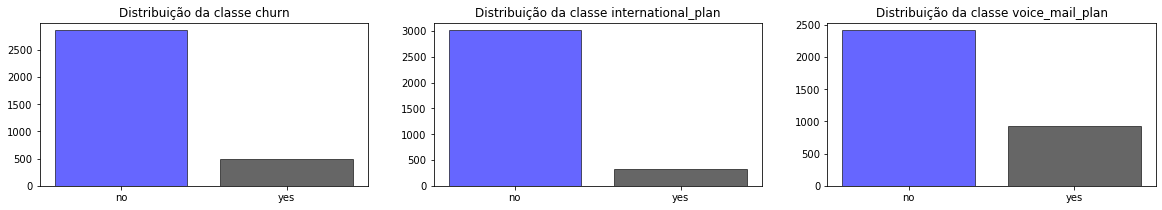

In [15]:
# Plotando a distribuição dos três atributos
exibe_grafico_classes(['churn', 'international_plan', 'voice_mail_plan'])

#### <font color='purplue'> A distribuição do No e Yes é um pouco diferente entre os atributos. </font>

### Convertendo os atributos preenchidos com Yes/No com 1 e 0 respectivamente

In [16]:
# Função para alterar os valores yes e no por 1 e 0
def converte_binario_sim_nao(df, atributo):
    df[atributo] = df[atributo].map(lambda x: 1 if x =='yes' else 0)

In [17]:
# Aplicação a conversão para cada categoria categória e para ambos dataframes carrregdos

converte_binario_sim_nao(dftreino, 'churn')
converte_binario_sim_nao(dfteste, 'churn')

converte_binario_sim_nao(dftreino, 'international_plan')
converte_binario_sim_nao(dfteste, 'international_plan')

converte_binario_sim_nao(dftreino, 'voice_mail_plan')
converte_binario_sim_nao(dfteste, 'voice_mail_plan')

churn
0    2850
1     483
dtype: int64 

international_plan
0    3010
1     323
dtype: int64 

voice_mail_plan
0    2411
1     922
dtype: int64 



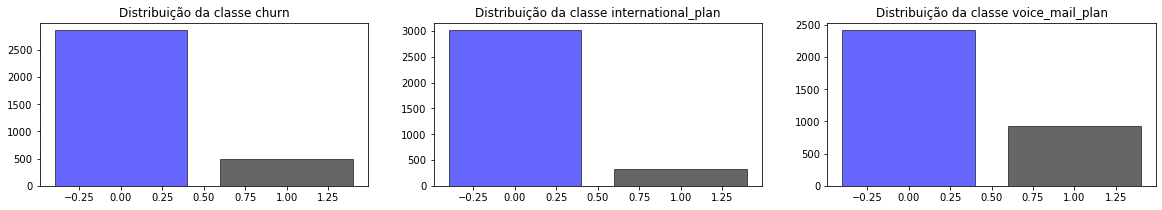

In [18]:
# Plotando a distribuição dos três atributos após os ajustes
exibe_grafico_classes(['churn', 'international_plan', 'voice_mail_plan'])

## ATRIBUTO AREA CODE

## Analisando a distribuição do atributo Area Code

area_code
area_code_408     838
area_code_415    1655
area_code_510     840
dtype: int64


<BarContainer object of 3 artists>

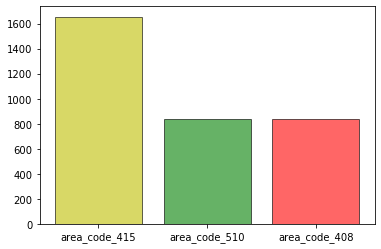

In [19]:
# Atributo area_code
print(dftreino.groupby('area_code').size())

x = dftreino['area_code'].value_counts().index
y = dftreino['area_code'].value_counts().values
plt.bar(x, y, ec = "k", alpha = .6, color = {'g','y', 'r'})
    

#### <font color='purplue'> Os valores dos códigos de área 408 e 510 são iguais e o código 415 é particamente a metade do dataset, e a soma das duas outras áreas. </font>

### Convertendo o atributo area_code para um campo numérico

In [20]:
dftreino['area_code'] = dftreino['area_code'].apply(lambda x: x[10:13])
dfteste['area_code'] = dfteste['area_code'].apply(lambda x: x[10:13])

In [21]:
# Atributo area_code
dftreino.groupby('area_code').size()

area_code
408     838
415    1655
510     840
dtype: int64

## ATRIBUTO STATE

<BarContainer object of 51 artists>

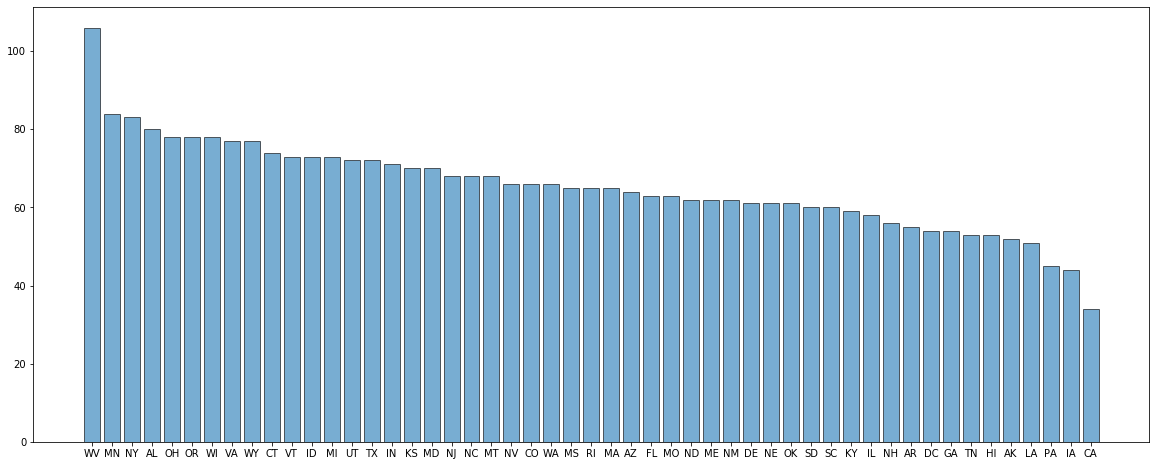

In [22]:
# Atributo state
dftreino.groupby('state').size()

x = dftreino['state'].value_counts().index
y = dftreino['state'].value_counts().values

plt.figure(figsize = (20, 8))

plt.bar(x, y, ec = "k", alpha = .6 )


### Convertendo o atributo Estado para um campo numérico

In [23]:
# Conversão do state (estado) para numérico utilizar o LabelEncoder
from sklearn.preprocessing import LabelEncoder

converter = LabelEncoder()

dftreino['state'] = converter.fit_transform(dftreino['state'] )
dfteste['state'] = converter.fit_transform(dfteste['state'] )

In [24]:
# Atributo voice_mail_plan
dftreino.groupby('state').size()

state
0      52
1      80
2      55
3      64
4      34
5      66
6      74
7      54
8      61
9      63
10     54
11     53
12     44
13     73
14     58
15     71
16     70
17     59
18     51
19     65
20     70
21     62
22     73
23     84
24     63
25     65
26     68
27     68
28     62
29     61
30     56
31     68
32     62
33     66
34     83
35     78
36     61
37     78
38     45
39     65
40     60
41     60
42     53
43     72
44     72
45     77
46     73
47     66
48     78
49    106
50     77
dtype: int64

# ATRIBUTOS NUMÉRICOS CONTÍNUOS

In [25]:
# Lista as primeiras linhas do conteúdo
dftreino.head(5)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,16,128,415,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,35,107,415,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,3,31,137,415,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,4,35,84,408,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,5,36,75,415,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Os atributos que são numéricos contínuos são:

* total_day_calls
* total_day_charge
* total_day_minutes <br>


* total_eve_calls
* total_eve_charge
* total_eve_minutes <br>


* total_intl_calls
* total_intl_charge
* total_intl_minutes <br>


* total_night_calls
* total_night_charge
* total_night_minutes <br>


* account_length
* number_vmail_messages
* number_customer_service_calls <br>


In [26]:
atributo_continuo = ['account_length',  'number_customer_service_calls', 'number_vmail_messages',
                    'total_day_calls', 'total_day_charge', 'total_day_minutes',                    
                    'total_eve_calls', 'total_eve_charge', 'total_eve_minutes',                     
                    'total_intl_calls', 'total_intl_charge', 'total_intl_minutes',                    
                    'total_night_minutes', 'total_night_charge', 'total_night_calls']

### Exibindo o Boxplot dos atributos

In [27]:
def exibir_graficos_varcontinuas(df, atributo ):
    total = len(atributo)

    coluna = 5
    linha = round(total/5,0) + 2
    total -= 1 

    plt.figure(figsize=(20, 20))

    for i in range(total):
        pos = i +1
        plt.subplot(linha, coluna, pos)
        df.boxplot(atributo[i])


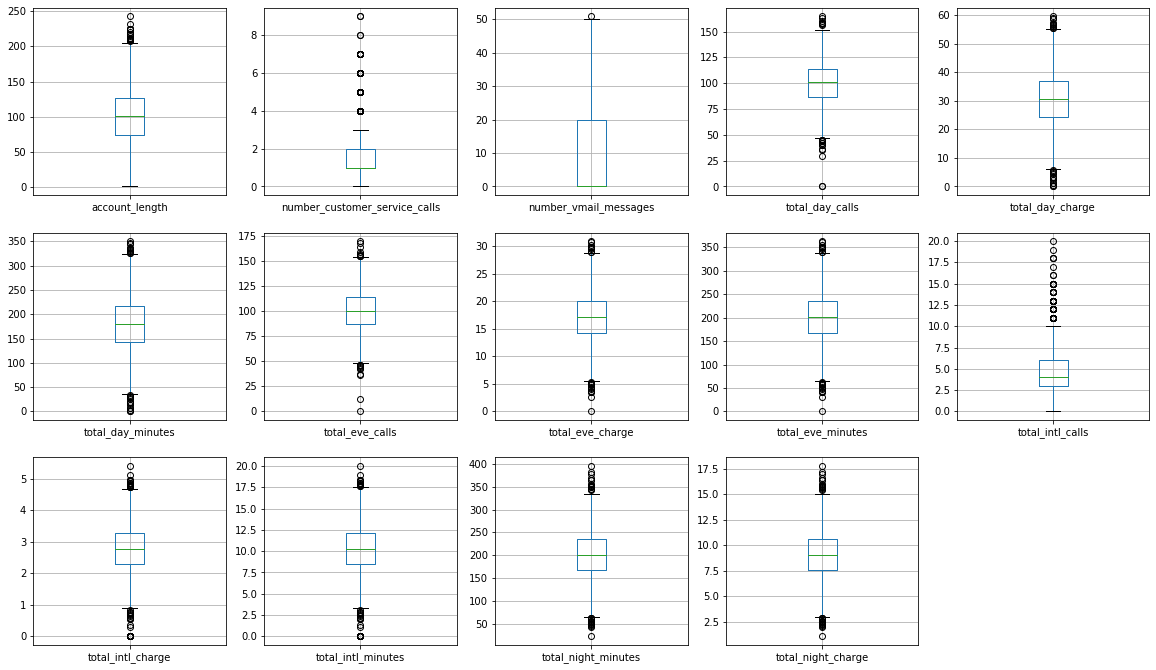

In [28]:
# Exibindo o Boxplot
exibir_graficos_varcontinuas(dftreino, atributo_continuo)

#### <font color='blue'> Comentário: Há outliers em todos esses atributos.

### ANÁLISE DOS OUTLIERS

### Analisando atributo *total_day_minutes*

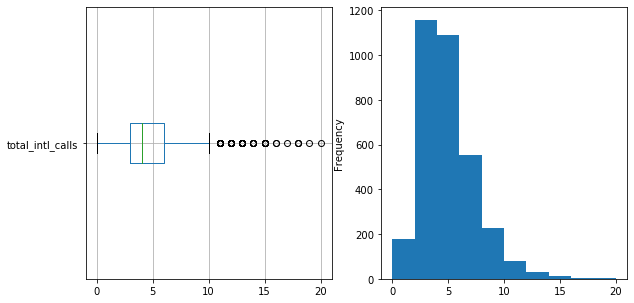

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
dftreino.boxplot('total_intl_calls', vert= False) 
plt.subplot(1,3,2)
dftreino['total_intl_calls'].plot(kind='hist')  

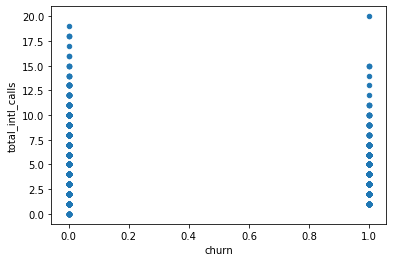

In [30]:

dftreino.plot(x='churn', y='total_intl_calls', kind='scatter') 

<font color='blue'> Há valores outliers concentrados após os valores min e max.

In [31]:
dftreino['total_day_minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total_day_minutes, dtype: float64

# FEATURE SELECTION

In [32]:
# Monta os atributos de atributo e o atributo alvo (target)
x_atributo = dftreino.iloc[:,1:-1].values
y_target = dftreino.iloc[:,-1].values

In [33]:
# Alterando a escala dos atributos

padronizar = StandardScaler()

x_atributo = padronizar.fit_transform(x_atributo)

In [34]:
dftreino

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,16,128,415,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,35,107,415,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,3,31,137,415,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,4,35,84,408,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,5,36,75,415,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,3,192,415,0,1,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,3330,49,68,415,0,0,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,3331,39,28,510,0,0,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,3332,6,184,510,1,0,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [35]:
# Executa o algoritmo de RandomForest para buscar quais são os atributos mais relevantes.
classif = RandomForestClassifier(n_estimators=50, random_state=0)
classif = classif.fit(x_atributo, y_target)

In [36]:
# Lista os atributos e suas respectivas importâncias
variavel_importancia = pd.Series(classif.feature_importances_, index = dftreino.iloc[:,1:-1].columns.values).sort_values(ascending=False)
variavel_importancia

total_day_charge                 0.146323
total_day_minutes                0.131661
number_customer_service_calls    0.116535
international_plan               0.077399
total_eve_minutes                0.073271
total_eve_charge                 0.060759
total_intl_calls                 0.046078
total_intl_charge                0.040213
total_intl_minutes               0.037073
total_night_minutes              0.034313
total_night_charge               0.033897
account_length                   0.031944
total_day_calls                  0.031127
total_night_calls                0.028923
number_vmail_messages            0.027532
total_eve_calls                  0.026338
state                            0.025859
voice_mail_plan                  0.023283
area_code                        0.007473
dtype: float64

In [37]:
# Monta o dataframe dos atributos mais importantes
dfatributosimport = pd.DataFrame(variavel_importancia)
dfatributosimport.columns = {'importancia'} 
dfatributosimport.sort_values(by ='importancia', ascending=False)
 

,importancia
total_day_charge,0.146323
total_day_minutes,0.131661
number_customer_service_calls,0.116535
international_plan,0.077399
total_eve_minutes,0.073271
total_eve_charge,0.060759
total_intl_calls,0.046078
total_intl_charge,0.040213
total_intl_minutes,0.037073
total_night_minutes,0.034313


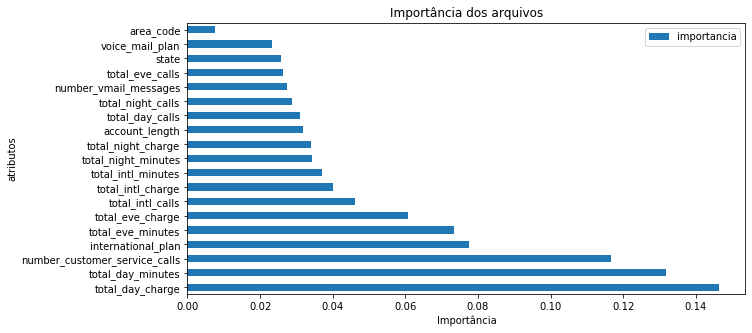

In [38]:
# Lista as colunas que são mais importantes.
dfatributosimport.plot(kind='barh', title='Importância dos arquivos', figsize=(10, 5))
plt.xlabel('Importância') 
plt.ylabel('atributos') 
plt.show()

In [39]:
# Verificando o agrupamento das importâncias
dfatributosimport['importancia'] = round(dfatributosimport['importancia'], 3)
dfatributosimport.groupby('importancia').size()

importancia
0.007    1
0.023    1
0.026    2
0.028    1
0.029    1
0.031    1
0.032    1
0.034    2
0.037    1
0.040    1
0.046    1
0.061    1
0.073    1
0.077    1
0.117    1
0.132    1
0.146    1
dtype: int64

In [40]:
# Gerando a lista dos atributos que possuem importância maior que 0.1
listavar = dfatributosimport.loc[dfatributosimport['importancia'] >= 0.01] 
print(listavar.shape)
listavar


(18, 1)


,importancia
total_day_charge,0.146
total_day_minutes,0.132
number_customer_service_calls,0.117
international_plan,0.077
total_eve_minutes,0.073
total_eve_charge,0.061
total_intl_calls,0.046
total_intl_charge,0.040
total_intl_minutes,0.037
total_night_minutes,0.034


In [41]:
# Gera o total das importância. Veja que correspondem quase todas as importâncias
listavar['importancia'].sum()

0.9920000000000001

In [42]:
atributos_select = listavar.index

# TREINO

In [43]:
# Usando apenas 18 atributos que foram selecionadas na etapa Feature Selection
# Não é necessário fazer o split, divindo a base em treino e teste pois os arquivos disponibilizados já estão divididos

x_treino = dftreino.loc[:,atributos_select].values
y_treino = dftreino.iloc[:,-1].values

x_teste = dfteste.loc[:,atributos_select].values
y_teste = dfteste.iloc[:,-1].values

In [44]:
# Montando o modelo
modelo_lrg = LogisticRegression()

# Treinando o modelo
modelo_lrg.fit(x_treino, y_treino)

# Predição
predicao_lrg = modelo_lrg.predict(x_teste)
predprobla_lrg = modelo_lrg.predict_proba(x_teste)

### Exibir as Probabilidade do cliente cancelar ou não o plano

A probabilidade de clientes cancelar o plano é de 85.16%  

E a probabilidade de clientes não cancelar é de 14.84%  



<BarContainer object of 2 artists>

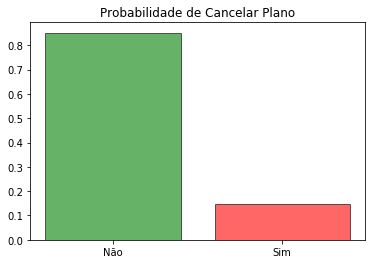

In [45]:

print('A probabilidade de clientes cancelar o plano é de %2.2f%% ' % (predprobla_lrg[:,0].mean() *100), '\n')
print('E a probabilidade de clientes não cancelar é de %2.2f%% ' % (predprobla_lrg[:,1].mean() *100), '\n')

no = predprobla_lrg[:,0].mean()
yes = predprobla_lrg[:,1].mean()

x = ['Não', 'Sim']
y = [no, yes]
 
plt.title("Probabilidade de Cancelar Plano" )    
plt.bar(x, y, ec = "k", alpha = .6, color = {'g','r'})

### Analisando a Acurácia e a Confusion Matrix

In [46]:
print('Acurácia: % 2.2f%% ' % round(accuracy_score(y_teste, predicao_lrg) *100,2))
print ('Confusion Matrix: \n', confusion_matrix(y_teste, predicao_lrg))

Acurácia:  87.40% 
Confusion Matrix: 
 [[1416   27]
 [ 183   41]]


# ANÁLISE DA CONCLUSÃO 1

O modelo está tendo uma taxa de erro alto para conseguir prever uma classe Yes. <br>
Isso ocorre porque a quantidade de ocorrência dessa classe dentro da amostra de treino é muito baixo. <br>
Consequentemente o modelo não consegue gerar uma boa previsão. <br>

Vamos aplicar uma técnica de Balanceamento (Sampling), treinando o modelo com a mesma quantidade (50% x 50%) das ocorrências de Yes e No da classe churn. <br>

## APLICANDO BALANCEAMENTO (UNDER-SAMPLING)

In [47]:
# Verificando quantidade de ocorrências da classe 1
qtd_churn_1 = dftreino['churn'][dftreino['churn']==1].value_counts()[1]

print('São %1.f ocorrências da classe 1 ' % qtd_churn_1)

São 483 ocorrências da classe 1 


In [48]:

# Separa as classes
df_classe_0 = dftreino[dftreino['churn'] == 0]
df_classe_1 = dftreino[dftreino['churn'] == 1]

# Busca os dados da classe 0 com a mesma quantidade da classe 1 de forma randômica
df_classe_0_balanc = df_classe_0.sample(qtd_churn_1)

# Junta os dois dataframes com as duas classes
df_treino_balanc = pd.concat([df_classe_0_balanc, df_classe_1], axis=0)

print('Distribuição dos registros: \n', df_treino_balanc['churn'].value_counts())


Distribuição dos registros: 
 1    483
0    483
Name: churn, dtype: int64


### Exibição da Distribuição

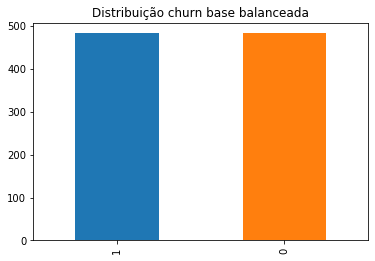

In [49]:
df_treino_balanc['churn'].value_counts().plot(kind='bar', title='Distribuição churn base balanceada',color = ['#1F77B4', '#FF7F0E']);

## Treinando o modelo com a base balanceada

A probabilidade de clientes cancelar o plano é de 58.60%  

E a probabilidade de clientes não cancelar é de 41.40%  



<BarContainer object of 2 artists>

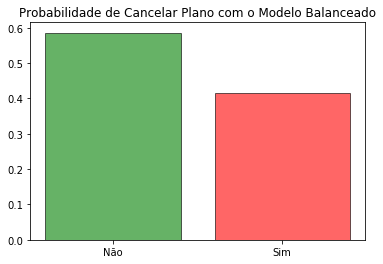

In [50]:
x_treino_balanc = df_treino_balanc.loc[:,atributos_select].values
y_treino_balanc = df_treino_balanc.iloc[:,-1].values

# Montando o modelo
modelo_lrg_balanc = LogisticRegression()

# Treinando o modelo
modelo_lrg_balanc.fit(x_treino_balanc, y_treino_balanc)

# Predição
predicao_lrg_balanc = modelo_lrg_balanc.predict(x_teste)
predproba_lrg_balanc = modelo_lrg_balanc.predict_proba(x_teste)


print('A probabilidade de clientes cancelar o plano é de %2.2f%% ' % (predproba_lrg_balanc[:,0].mean() *100), '\n')
print('E a probabilidade de clientes não cancelar é de %2.2f%% ' % (predproba_lrg_balanc[:,1].mean() *100), '\n')


no = predproba_lrg_balanc[:,0].mean()
yes = predproba_lrg_balanc[:,1].mean()

x = ['Não', 'Sim']
y = [no, yes]
 
plt.title("Probabilidade de Cancelar Plano com o Modelo Balanceado" )    
plt.bar(x, y, ec = "k", alpha = .6, color = {'g','r'})


In [51]:
## Verificando a acurácia do modelo balanceado
print('Acurácia: % 2.2f%% ' % round(accuracy_score(y_teste, predicao_lrg_balanc) *100,2))
print ('Confusion Matrix: \n', confusion_matrix(y_teste, predicao_lrg_balanc))

Acurácia:  76.54% 
Confusion Matrix: 
 [[1091  352]
 [  39  185]]


# ANÁLISE FINAL APÓS O BALANCEAMENTO

Com a aplicação do balanceamento (Undersampling), o novo modelo treinado conseguiu acertar 4x o Falso Positivo se comparado com o modelo anterior em modos quantitaivos. <br>

Porém, como era de esperar, aumentou consideravelmente o erro de previsão dos demais, principalmente do Verdadeiro Positivo, uma vez que a massa
de treino da classe 0 foi diminituído dastricamente e o modelo perdeu dados importantes dessa classe.  <br>

Existem outras técnicas mais avançadas de Balanceamento, como SMOTE.